In [4]:
# !pip install geopandas
# !pip install sentinelsat
# !pip3 install rasterio

In [6]:
# importing necessary libraries
import numpy as np
import rasterio as rio
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

In [15]:
# Plotting boundary of map
m = folium.Map([-13.2512161,34.3015278], zoom_start=7)
boundsdata = r'C:/Users/Aimable Ishimwe/Desktop/Ishango/Data_Preprocessing/malawi.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [19]:
# connect to the API
user = 'ishimwemanziaimable' ## change this!
password = 'mamamanzi@1' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [20]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

GEOMETRYCOLLECTION(POLYGON((32.6733 -16.9517,36.3428 -16.9517,36.3428 -9.1455,32.6733 -9.1455,32.6733 -16.9517)))


In [21]:
#Search for images that fall with the date range 25th Feb 2019 - 27 Feb 2019, we want sentinel 2 level2A and 
#cloud cover of 0-20%
products = api.query(footprint,
                     date = ('20190225', '20190227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

In [22]:
print(len(products))

27


In [23]:
#showing results in a table
api.to_geodataframe(products)

,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
c913ac22-324b-47fb-b094-02f3914b9d57,S2B_MSIL2A_20190226T074859_N0211_R135_T36LVN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 22:02:10.988,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.07 GB,c913ac22-324b-47fb-b094-02f3914b9d57,"POLYGON ((32.08473 -10.85412, 33.08930 -10.855..."
a3396d24-384d-49d5-aea6-5a0cfaf7afc9,S2B_MSIL2A_20190226T074859_N0211_R135_T36LVP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 22:02:04.557,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.07 GB,a3396d24-384d-49d5-aea6-5a0cfaf7afc9,"POLYGON ((32.08737 -9.94962, 33.08904 -9.95085..."
842a50c5-f15c-442e-948d-cb48230f49ef,S2B_MSIL2A_20190226T074859_N0211_R135_T36LWK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 22:01:10.307,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,329.60 MB,842a50c5-f15c-442e-948d-cb48230f49ef,"POLYGON ((33.38308 -13.56767, 33.36917 -13.630..."
48e91fde-ba33-4e31-ba74-e435a30d786a,S2B_MSIL2A_20190226T074859_N0211_R135_T36LXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 22:00:42.295,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,30.19 MB,48e91fde-ba33-4e31-ba74-e435a30d786a,"POLYGON ((33.98349 -10.85381, 33.96119 -10.957..."
b5fab413-149f-422f-9fd0-5c2e6bac8f33,S2B_MSIL2A_20190226T074859_N0211_R135_T36LVL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 22:00:30.559,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.04 GB,b5fab413-149f-422f-9fd0-5c2e6bac8f33,"POLYGON ((32.07874 -12.66241, 33.08988 -12.663..."
6b05e281-b38b-43f5-8755-96fa26aba9a6,S2B_MSIL2A_20190226T074859_N0211_R135_T36LWN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 22:00:20.269,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.01 GB,6b05e281-b38b-43f5-8755-96fa26aba9a6,"POLYGON ((33.98347 -10.85388, 33.96119 -10.957..."
39fc7540-d771-4d01-941b-048b1f2c35a0,S2B_MSIL2A_20190226T074859_N0211_R135_T36LWL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-26T07:48:59.024Z, Instrument: MS...",false,2019-02-26 21:59:22.323,2019-02-26 07:48:59.024,2019-02-26 07:48:59.024,10314,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,561.38 MB,39fc7540-d771-4d01-941b-048b1f2c35a0,"POLYGON (

<AxesSubplot:>

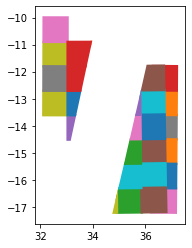

In [24]:
#plot table as geopandas dataframe based on uuid
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

C:\Users\AIMABL~1\AppData\Local\Temp/ipykernel_14916/1206559645.py:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


c913ac22-324b-47fb-b094-02f3914b9d57    Annotation(32.5863, -11.3516, 'c913ac22-324b-4...
a3396d24-384d-49d5-aea6-5a0cfaf7afc9    Annotation(32.5876, -10.447, 'a3396d24-384d-49...
842a50c5-f15c-442e-948d-cb48230f49ef    Annotation(33.1436, -13.9975, '842a50c5-f15c-4...
48e91fde-ba33-4e31-ba74-e435a30d786a    Annotation(33.9382, -10.9567, '48e91fde-ba33-4...
b5fab413-149f-422f-9fd0-5c2e6bac8f33    Annotation(32.5835, -13.1599, 'b5fab413-149f-4...
6b05e281-b38b-43f5-8755-96fa26aba9a6    Annotation(33.4392, -11.3303, '6b05e281-b38b-4...
39fc7540-d771-4d01-941b-048b1f2c35a0    Annotation(33.2411, -13.1215, '39fc7540-d771-4...
b01923cb-4105-4e4e-9c6d-0e8e0a4ad734    Annotation(32.585, -12.2555, 'b01923cb-4105-4e...
6a3795d7-5890-448c-b3b5-930bf09f2d0c    Annotation(33.3397, -12.2285, '6a3795d7-5890-4...
a67b352e-6aa7-42ab-9dae-a2abf4b3330f    Annotation(36.7302, -14.054, 'a67b352e-6aa7-42...
42968021-d20a-4a40-a651-30006f5e11eb    Annotation(36.7388, -13.1503, '42968021-d20a-4...
6d36ca7a-5

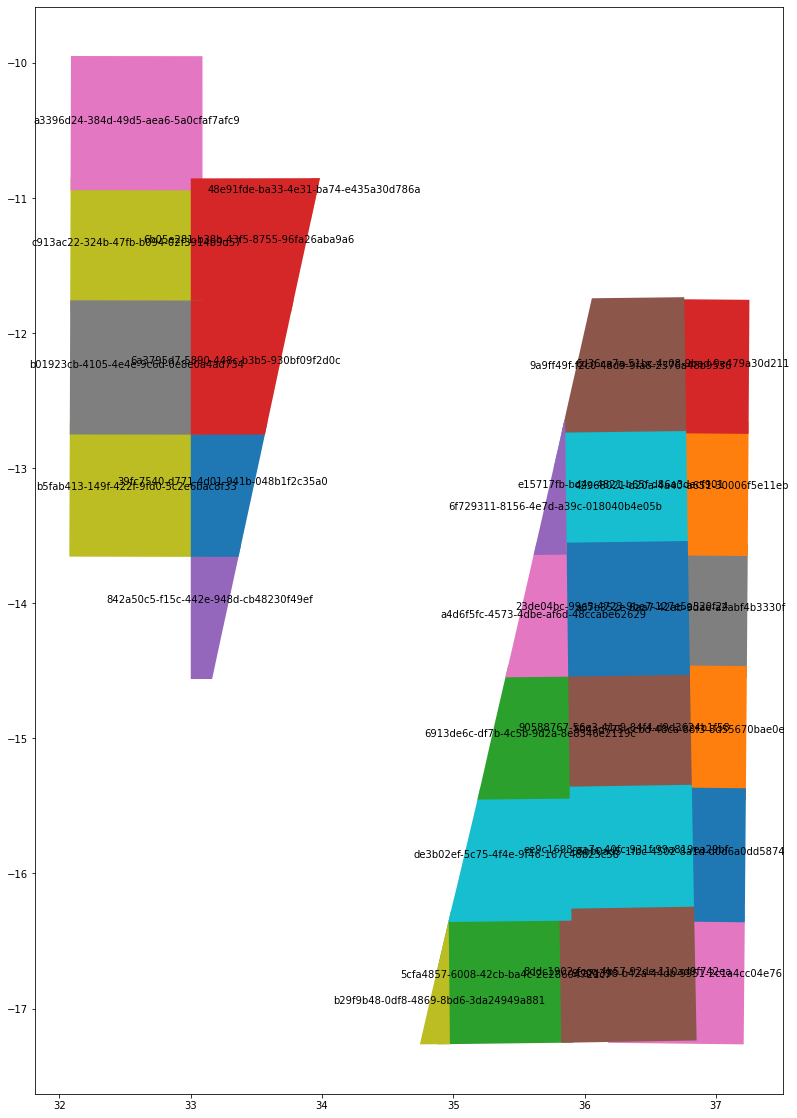

In [25]:
#Labelling all polygons
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

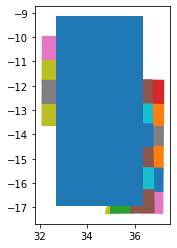

In [26]:
#Use geopandas to check which scene to download
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [27]:
#checking online api and Get the uuid and inspect produuct data
api.get_product_odata('c913ac22-324b-47fb-b094-02f3914b9d57')

{'id': 'c913ac22-324b-47fb-b094-02f3914b9d57',
 'title': 'S2B_MSIL2A_20190226T074859_N0211_R135_T36LVN_20190226T135056',
 'size': 1150643384,
 'md5': '24b9fc45f9097277f25e2054b2ca14b2',
 'date': datetime.datetime(2019, 2, 26, 7, 48, 59, 24000),
 'footprint': 'POLYGON((32.08473397417759 -10.854120303387177,33.08929816523275 -10.855468267007058,33.08960741879901 -11.848475404292838,32.081564801061084 -11.847000833113952,32.08473397417759 -10.854120303387177))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('c913ac22-324b-47fb-b094-02f3914b9d57')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 26, 22, 10, 42, 445000),
 'Ingestion Date': datetime.datetime(2019, 2, 26, 22, 2, 10, 988000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('c913ac22-324b-47fb-b094-02f3914b9d57')/Products('Quicklook')/$value"}

In [82]:
# Downloading the data
api.download_all(products)

Fetching archival status:   4%|3         | 1/27 [00:02<01:00,  2.33s/product]

LTA retrieval:   0%|          | 0/3 [00:00<?, ?product/s]

KeyboardInterrupt: 

In [29]:
# unzipping the downloaded file
import zipfile
with zipfile.ZipFile("C:/Users/Aimable Ishimwe/Desktop/Ishango/Data_Preprocessing/S2B_MSIL2A_20190226T074859_N0211_R135_T36LVN_20190226T135056.zip","r") as zip_ref:
    zip_ref.extractall("C:/Users/Aimable Ishimwe/Desktop/Ishango/Data_Preprocessing/")

In [57]:
# R10 = 'content/S2A_MSIL2A_20190225T072901_N0211_R049_T36LYL_20190225T102845.SAFE/GRANULE/L2A_T36LYL_A019208_20190225T075255/IMG_DATA/R10m'
R10 = 'C:/Users/Aimable Ishimwe/Desktop/Ishango/Data_Preprocessing/S2B_MSIL2A_20190226T074859_N0211_R135_T36LVN_20190226T135056.SAFE/GRANULE/L2A_T36LVN_A010314_20190226T081205/IMG_DATA/R10m'
b4 = rio.open(R10+'/T36LVN_20190226T074859_B04_10m.jp2')
b3 = rio.open(R10+'/T36LVN_20190226T074859_B03_10m.jp2')
b2 = rio.open(R10+'/T36LVN_20190226T074859_B02_10m.jp2')
b8 = rio.open(R10+'/T36LVN_20190226T074859_B08_10m.jp2')

In [58]:
b4.count

1

In [59]:
b4.width

10980

In [60]:
b4.height

10980

In [61]:
from rasterio import plot

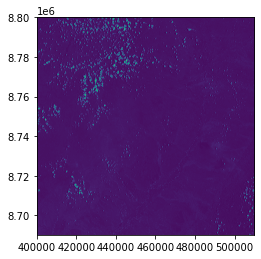

<AxesSubplot:>

In [62]:
plot.show(b3) 

In [40]:
b4.dtypes

('uint16',)

In [63]:
b4.transform

Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 8800000.0)

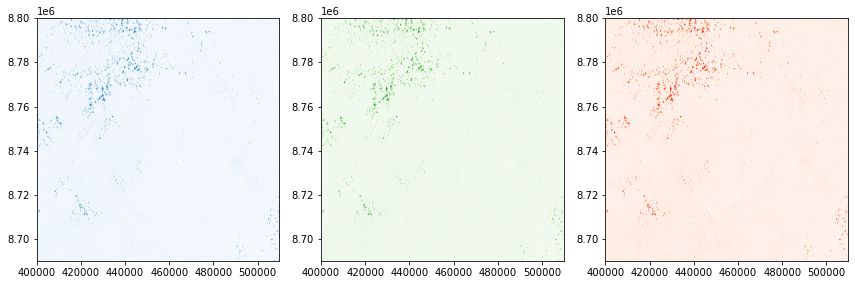

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
plot.show(b2, ax = ax1, cmap = 'Blues')
plot.show(b3, ax = ax2, cmap = 'Greens')
plot.show(b4, ax = ax3, cmap = 'Reds')
fig.tight_layout()

In [68]:
# Create an RGB image 
# with rio.open('RGB_Image/RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
#               count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
#     rgb.write(b2.read(1),1) 
#     rgb.write(b3.read(1),2) 
#     rgb.write(b4.read(1),3) 
#     rgb.close()

In [ ]:
truecolor = rio.open('RGB_Image/RGB.tiff','w',driver='Gtiff',width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]
                    )
truecolor.write(b2.read(1),3) 
truecolor.write(b3.read(1),2) 
truecolor.write(b4.read(1),1) 
truecolor.close()

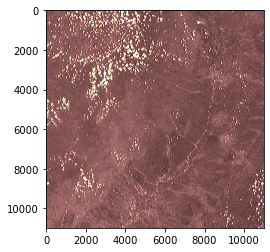

In [72]:
src = rio.open("RGB_Image/RGB.tiff")
plt.imshow(src.read(1), cmap='pink')
plt.show()

In [74]:
nReserve = gpd.read_file('C:/Users/Aimable Ishimwe/Desktop/Ishango/Data/MWI_adm0.shp')

In [78]:
from rasterio.mask import mask

In [88]:
nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'}
#     out_image, out_transform = rio.mask.mask(src, shapes, all_touched=False, invert=False, nodata=None, filled=True, crop=False, pad=False, pad_width=0.5, indexes=None)

with rio.open("RGB_Image/RGB.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True    
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

SyntaxError: invalid syntax (Temp/ipykernel_14916/2309942723.py, line 4)

## NVDI

In [86]:
# Open b4 and b8

b4 = rio.open(R10+'/T36LVN_20190226T074859_B04_10m.jp2')
b8 = rio.open(R10+'/T36LVN_20190226T074859_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))